# EDA

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from collections import defaultdict
from IPython.core.display import display, HTML

from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/fifaworldcup/player_passing.csv')

In [ ]:
df.head()

,player,position,team,age,birth_year,minutes_90s,passes_completed,passes,passes_pct,passes_total_distance,...,passes_pct_long,assists,xg_assist,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,170.0,217.0,78.3,2819.0,...,58.1,0,0.1,0.1,-0.1,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,88.0,112.0,78.6,1796.0,...,78.3,0,0.0,0.1,0.0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,45.0,58.0,77.6,690.0,...,70.0,1,0.9,0.1,0.1,3.0,3.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,122.0,161.0,75.8,2462.0,...,54.1,0,0.0,0.1,0.0,1.0,13.0,1.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,8.0,15.0,53.3,64.0,...,NaN,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.describe()

,birth_year,minutes_90s,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,...,passes_pct_long,assists,xg_assist,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
count,680.000000,680.000000,677.000000,677.000000,674.000000,677.000000,677.000000,677.000000,677.000000,665.000000,...,598.000000,680.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,1994.913235,2.124265,82.471196,101.630724,76.860682,1444.413589,484.301329,37.771049,42.243722,86.947368,...,55.554682,0.177941,0.167504,0.154948,0.009749,1.586411,5.930576,1.333826,0.372230,5.135894
std,4.156348,1.642302,90.047133,102.477517,12.691058,1625.587218,597.897520,41.550310,44.893905,12.262379,...,27.036206,0.487652,0.320791,0.286005,0.358530,2.392108,8.250671,2.085650,0.830447,6.510290
min,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,0.800000,20.000000,28.000000,69.200000,301.000000,70.000000,9.000000,11.000000,81.800000,...,40.075000,0.000000,0.000000,0.000000,-0.100000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1995.000000,1.900000,52.000000,69.000000,78.550000,841.000000,255.000000,24.000000,28.000000,89.100000,...,55.600000,0.000000,0.000000,0.100000,0.000000,1.000000,3.000000,1.000000,0.000000,3.000000
75%,1998.000000,3.000000,110.000000,141.000000,86.000000,2017.000000,676.000000,51.000000,57.000000,95.300000,...,71.925000,0.000000,0.200000,0.200000,0.000000,2.000000,8.000000,2.000000,0.000000,7.000000
max,2004.000000,7.700000,642.000000,689.000000,100.000000,12636.000000,3349.000000,281.000000,306.000000,100.000000,...,100.000000,3.000000,3.100000,3.600000,2.100000,21.000000,71.000000,18.000000,6.000000,61.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player                       680 non-null    object 
 1   position                     680 non-null    object 
 2   team                         680 non-null    object 
 3   age                          680 non-null    object 
 4   birth_year                   680 non-null    int64  
 5   minutes_90s                  680 non-null    float64
 6   passes_completed             677 non-null    float64
 7   passes                       677 non-null    float64
 8   passes_pct                   674 non-null    float64
 9   passes_total_distance        677 non-null    float64
 10  passes_progressive_distance  677 non-null    float64
 11  passes_completed_short       677 non-null    float64
 12  passes_short                 677 non-null    float64
 13  passes_pct_short    

In [ ]:
df1=df.drop(['birth_year','passes_total_distance','passes_progressive_distance','assists','xg_assist','pass_xa','xg_assist_net','assisted_shots'],axis=1)

In [ ]:
df1.head()

,player,position,team,age,minutes_90s,passes_completed,passes,passes_pct,passes_completed_short,passes_short,...,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32-094,4.0,170.0,217.0,78.3,78.0,90.0,...,59.0,73.0,80.8,18.0,31.0,58.1,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31-357,3.0,88.0,112.0,78.6,37.0,41.0,...,27.0,35.0,77.1,18.0,23.0,78.3,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,2.0,45.0,58.0,77.6,30.0,33.0,...,7.0,13.0,53.8,7.0,10.0,70.0,3.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,3.0,122.0,161.0,75.8,57.0,63.0,...,44.0,51.0,86.3,20.0,37.0,54.1,13.0,1.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,0.8,8.0,15.0,53.3,7.0,9.0,...,0.0,4.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0


In [ ]:
df1.columns

Index(['player', 'position', 'team', 'age', 'minutes_90s', 'passes_completed',
       'passes', 'passes_pct', 'passes_completed_short', 'passes_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_medium',
       'passes_pct_medium', 'passes_completed_long', 'passes_long',
       'passes_pct_long', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes'],
      dtype='object')

In [ ]:
targets = ['passes_completed',
       'passes', 'passes_pct', 'passes_completed_short', 'passes_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_medium',
       'passes_pct_medium', 'passes_completed_long', 'passes_long',
       'passes_pct_long', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes']

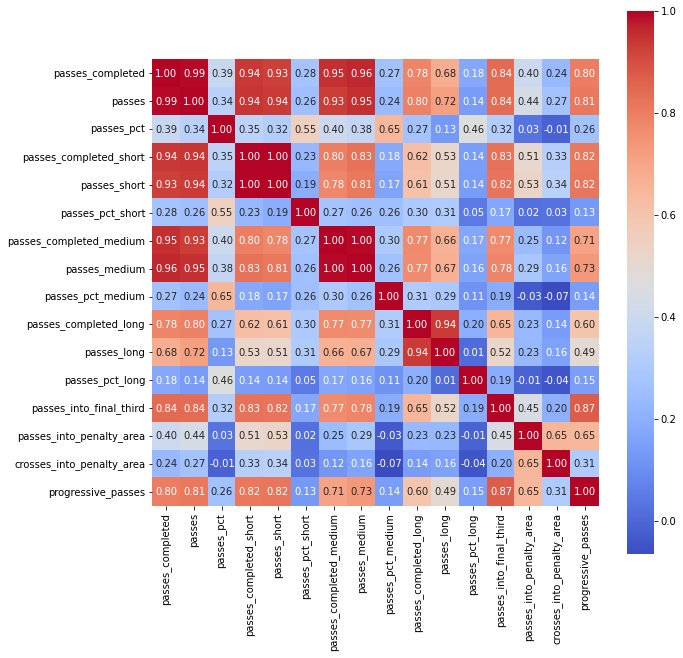

In [ ]:
corr = df1[targets].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
df1['minutes_90s']=df['minutes_90s']*90

In [ ]:
df1=df1.rename(columns={'minutes_90s':'minutes'})

In [ ]:
df1.head()

,player,position,team,age,minutes,passes_completed,passes,passes_pct,passes_completed_short,passes_short,...,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32-094,360.0,170.0,217.0,78.3,78.0,90.0,...,59.0,73.0,80.8,18.0,31.0,58.1,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31-357,270.0,88.0,112.0,78.6,37.0,41.0,...,27.0,35.0,77.1,18.0,23.0,78.3,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,180.0,45.0,58.0,77.6,30.0,33.0,...,7.0,13.0,53.8,7.0,10.0,70.0,3.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,270.0,122.0,161.0,75.8,57.0,63.0,...,44.0,51.0,86.3,20.0,37.0,54.1,13.0,1.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,72.0,8.0,15.0,53.3,7.0,9.0,...,0.0,4.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0


In [ ]:
df1['age'] = df['age'].str.replace('-','.')

In [ ]:
df1['age'] = df1['age'].astype('float')

In [ ]:
df1['age'] = df1['age'].astype('int')

In [ ]:
df1.head()

,player,position,team,age,minutes,passes_completed,passes,passes_pct,passes_completed_short,passes_short,...,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32,360.0,170.0,217.0,78.3,78.0,90.0,...,59.0,73.0,80.8,18.0,31.0,58.1,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31,270.0,88.0,112.0,78.6,37.0,41.0,...,27.0,35.0,77.1,18.0,23.0,78.3,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26,180.0,45.0,58.0,77.6,30.0,33.0,...,7.0,13.0,53.8,7.0,10.0,70.0,3.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29,270.0,122.0,161.0,75.8,57.0,63.0,...,44.0,51.0,86.3,20.0,37.0,54.1,13.0,1.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32,72.0,8.0,15.0,53.3,7.0,9.0,...,0.0,4.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     680 non-null    object 
 1   position                   680 non-null    object 
 2   team                       680 non-null    object 
 3   age                        680 non-null    int64  
 4   minutes                    680 non-null    float64
 5   passes_completed           677 non-null    float64
 6   passes                     677 non-null    float64
 7   passes_pct                 674 non-null    float64
 8   passes_completed_short     677 non-null    float64
 9   passes_short               677 non-null    float64
 10  passes_pct_short           665 non-null    float64
 11  passes_completed_medium    677 non-null    float64
 12  passes_medium              677 non-null    float64
 13  passes_pct_medium          664 non-null    float64

In [ ]:
df1.isnull().sum()

player                        0
position                      0
team                          0
age                           0
minutes                       0
passes_completed              3
passes                        3
passes_pct                    6
passes_completed_short        3
passes_short                  3
passes_pct_short             15
passes_completed_medium       3
passes_medium                 3
passes_pct_medium            16
passes_completed_long         3
passes_long                   3
passes_pct_long              82
passes_into_final_third       3
passes_into_penalty_area      3
crosses_into_penalty_area     3
progressive_passes            3
dtype: int64

In [ ]:
df1=df1.drop(['passes_pct','passes_pct_short','passes_pct_medium','passes_pct_long'],axis=1)

In [ ]:
df1=df1.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 679
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     677 non-null    object 
 1   position                   677 non-null    object 
 2   team                       677 non-null    object 
 3   age                        677 non-null    int64  
 4   minutes                    677 non-null    float64
 5   passes_completed           677 non-null    float64
 6   passes                     677 non-null    float64
 7   passes_completed_short     677 non-null    float64
 8   passes_short               677 non-null    float64
 9   passes_completed_medium    677 non-null    float64
 10  passes_medium              677 non-null    float64
 11  passes_completed_long      677 non-null    float64
 12  passes_long                677 non-null    float64
 13  passes_into_final_third    677 non-null    float64

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#X is feature vectors
x = df1[['passes_completed',
       'passes', 'passes_completed_short', 'passes_short',
       'passes_completed_medium', 'passes_medium', 'passes_completed_long',
       'passes_long', 'passes_into_final_third', 'passes_into_penalty_area',
       'crosses_into_penalty_area', 'progressive_passes']]

# y is labels
y = df1[['position']]

In [ ]:
x_scaled = StandardScaler().fit_transform(x)

In [ ]:
features =x.T

In [ ]:
covariance_matrix = np.cov(features)

In [ ]:
x.head()

,passes_completed,passes,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,170.0,217.0,78.0,90.0,59.0,73.0,18.0,31.0,22.0,1.0,0.0,14.0
1,88.0,112.0,37.0,41.0,27.0,35.0,18.0,23.0,7.0,1.0,0.0,5.0
2,45.0,58.0,30.0,33.0,7.0,13.0,7.0,10.0,3.0,0.0,0.0,0.0
3,122.0,161.0,57.0,63.0,44.0,51.0,20.0,37.0,13.0,1.0,0.0,8.0
4,8.0,15.0,7.0,9.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y.head()

,position
0,MF
1,MF
2,MF
3,DF
4,FW


In [ ]:
print(covariance_matrix)

[[8.10848623e+03 9.16828669e+03 3.51435360e+03 3.75389830e+03
  3.75309122e+03 4.06374441e+03 7.09614347e+02 1.05529447e+03
  6.26836015e+02 7.45525290e+01 1.76852936e+01 4.71259837e+02]
 [9.16828669e+03 1.05016415e+04 4.01517420e+03 4.31054428e+03
  4.17809728e+03 4.56025252e+03 8.19481383e+02 1.26764241e+03
  7.09804207e+02 9.34725687e+01 2.30799669e+01 5.42936351e+02]
 [3.51435360e+03 4.01517420e+03 1.72642827e+03 1.86062393e+03
  1.45481306e+03 1.60972041e+03 2.60151475e+02 3.77513591e+02
  2.83618697e+02 4.42954778e+01 1.12480706e+01 2.20877313e+02]
 [3.75389830e+03 4.31054428e+03 1.86062393e+03 2.01546270e+03
  1.53797725e+03 1.70950068e+03 2.74876784e+02 3.99354973e+02
  3.05147123e+02 4.93134893e+01 1.25585532e+01 2.39443162e+02]
 [3.75309122e+03 4.17809728e+03 1.45481306e+03 1.53797725e+03
  1.91492679e+03 2.04068943e+03 3.40206694e+02 5.03076506e+02
  2.77174152e+02 2.24533161e+01 4.51315191e+00 2.01023516e+02]
 [4.06374441e+03 4.56025252e+03 1.60972041e+03 1.70950068e+03
  2

In [ ]:
values, vectors = np.linalg.eig(covariance_matrix)

print('\nEigenvalues \n%s '% values[:])
print('\nEigenvectros \n%s'  %  vectors[:])


Eigenvalues 
[2.58577861e+04 7.89945411e+02 2.42835554e+02 3.88028936e+01
 2.68655381e+01 6.70972124e+00 5.46009750e+00 3.43410048e-01
 2.72217900e-01 1.64000088e+00 2.28292154e+00 2.98127762e+00] 

Eigenvectros 
[[-5.59198762e-01 -6.17942873e-02  1.33229556e-01 -6.19098583e-01
  -3.74030299e-02 -1.51610058e-01 -8.68473036e-02 -3.08936470e-01
  -2.64704209e-01  9.78300405e-02  2.73850653e-01  2.10483518e-02]
 [-6.35902415e-01  5.11021638e-02 -3.65555935e-01  5.21145442e-01
   3.24735457e-02  1.18586520e-02 -1.50523893e-01  1.47659353e-01
   1.52941622e-01  1.50003358e-01  2.99376215e-01 -8.13561463e-02]
 [-2.44045312e-01  4.74782460e-01  1.42111550e-01 -1.79932200e-01
  -1.23318627e-01  5.27315445e-02  3.90666843e-01  3.57090364e-01
   2.87994494e-01  2.13922497e-02 -9.73429243e-02  5.21014300e-01]
 [-2.61377612e-01  5.54883333e-01  1.27026459e-01  9.14460653e-02
  -4.35586861e-02  9.43167803e-02 -1.05781629e-01 -1.88842372e-01
  -1.75976820e-01 -2.67666065e-01 -5.05451830e-01 -4.2842

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.9585504838413552, 0.029283348313353125, 0.009001936104076553, 0.0014384267999525686, 0.0009959079442818932, 0.0002487299772272595, 0.00020240631142562498, 1.2730241755973549e-05, 1.0091142344211258e-05, 6.0794981818890424e-05, 8.462810939727088e-05, 0.00011051623301148388]


In [ ]:
projected_x = x.dot(vectors.T[0])
projected_y = x.dot(vectors.T[1])

In [ ]:
result = pd.DataFrame(projected_x, columns =['PC1'])
result['PC2'] = projected_y
result['y-axis']=0.0
result['label'] = y

In [ ]:
result.head()

,PC1,PC2,y-axis,label
0,-315.772663,21.799625,0.0,MF
1,-159.950798,7.151005,0.0,MF
2,-84.636353,21.396598,0.0,MF
3,-231.086158,11.867255,0.0,DF
4,-19.234263,6.888969,0.0,FW


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


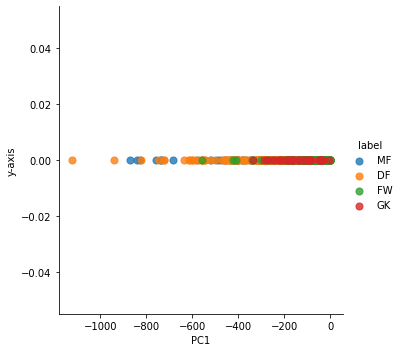

In [ ]:
sns.lmplot('PC1','y-axis', data = result, 
           fit_reg=False,                      # no line
           scatter_kws ={"s":50},              # marker size
            hue ="label")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


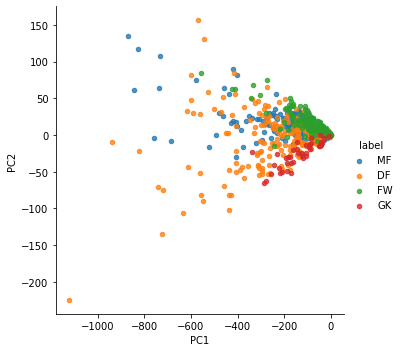

In [ ]:
sns.lmplot('PC1','PC2',data = result, 
           fit_reg=False, #no line
           scatter_kws ={"s":20},#marker size
            hue ="label") #color